# Download dataset from Kaggle & Read dataset

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
import pandas as pd
import numpy as np

od.download(
    "https://www.kaggle.com/datasets/jiashenliu/515k-hotel-reviews-data-in-europe")

df = pd.read_csv("515k-hotel-reviews-data-in-europe/Hotel_Reviews.csv")

Skipping, found downloaded files in "./515k-hotel-reviews-data-in-europe" (use force=True to force download)


| Field                                      | Description                                                                                      | Data Type             | Possible Values / Range  |
|--------------------------------------------|--------------------------------------------------------------------------------------------------|-----------------------|--------------------------|
| Hotel_Address                              | Address of the hotel                                                                             | String                | Text                       |
| Review_Date                                | Date when the reviewer posted the corresponding review                                           | Date (YYYY-MM-DD)     | Date format                |
| Average_Score                              | Average score of the hotel, calculated based on the latest comment in the last year             | Float                 | Range: 0.0 to 10.0        |
| Hotel_Name                                 | Name of the hotel                                                                                | String                | Text                       |
| Reviewer_Nationality                       | Nationality of the reviewer                                                                      | String                | Text                       |
| Negative_Review                            | Negative review the reviewer gave to the hotel. If the reviewer did not give a negative review, it is labeled as 'No Negative'    | String                | Text                       |
| Review_Total_Negative_Word_Counts          | Total number of words in the negative review                                                     | Integer               | Non-negative integer       |
| Positive_Review                            | Positive review the reviewer gave to the hotel. If the reviewer did not give a positive review, it is labeled as 'No Positive'    | String                | Text                       |
| Review_Total_Positive_Word_Counts          | Total number of words in the positive review                                                     | Integer               | Non-negative integer       |
| Reviewer_Score                             | Score the reviewer has given to the hotel, based on their experience                            | Float                 | Range: 0.0 to 10.0        |
| Total_Number_of_Reviews_Reviewer_Has_Given | Number of reviews the reviewer has given in the past                                             | Integer               | Non-negative integer       |
| Total_Number_of_Reviews                    | Total number of valid reviews the hotel has                                                      | Integer               | Non-negative integer       |
| Tags                                       | Tags the reviewer gave the hotel                                                                 | String                | Text                       |
| Days_Since_Review                          | Duration between the review date and scrape date                                                 | Integer               | Non-negative integer       |
| Additional_Number_of_Scoring               | Number of guests who provided a scoring on the service without leaving a review                  | Integer               | Non-negative integer       |
| Latitude                                   | Latitude of the hotel                                                                            | Float                 | Latitude values            |
| Longitude                                  | Longitude of the hotel                                                                           | Float                 | Longitude values           |


{"username":"sricharanmahavadi","key":"0452c96596747539add646c27eb16868"}

In [ ]:
import opendatasets as od
import pandas as pd
import numpy as np

# Eric's Kaggle API key
# "username":"ericthedataguy",
# "key":"875c0de0faea2fefa081c78eb470a347"

od.download(
    "https://www.kaggle.com/datasets/ericthedataguy/cleaned-hotel-review-for-ba820")
df = pd.read_csv("/content/cleaned-hotel-review-for-ba820/hotel_reviews_cleaned.csv")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ericthedataguy
Your Kaggle Key: ··········


100%|██████████| 45.1M/45.1M [00:00<00:00, 96.9MB/s]


In [ ]:
df = pd.read_csv("/content/cleaned-hotel-review-for-ba820/hotel_reviews_cleaned.csv")

**Do reviewers from different nationalities assign similar standard review scores?**

In [ ]:
# Calculate the mean 'Reviewer_Score' for reviewers who have given less than 5 reviews, group by hotel names
mean_scores = df[df['Total_Number_of_Reviews_Reviewer_Has_Given'] < 5].groupby('Hotel_Name')['Reviewer_Score'].mean()
mean_scores


Hotel_Name
11 Cadogan Gardens                    8.943011
1K Hotel                              7.851471
25hours Hotel beim MuseumsQuartier    9.023853
41                                    9.693750
45 Park Lane Dorchester Collection    9.743750
                                        ...   
citizenM London Bankside              9.134682
citizenM London Shoreditch            9.165463
citizenM Tower of London              9.158608
every hotel Piccadilly                8.954875
pentahotel Vienna                     8.378049
Name: Reviewer_Score, Length: 1491, dtype: float64

# Subset Dataset

In [ ]:
import pandas as pd

# Randomly subset the dataset into 100,000 entries
df = data.sample(n=1000, random_state=42)

# Reset the index of the subsetted data
df.reset_index(drop=True, inplace=True)

# Now subset_data contains 1,000 randomly selected entries from your original dataset

In [ ]:
df.to_csv('subset.csv', index=False)

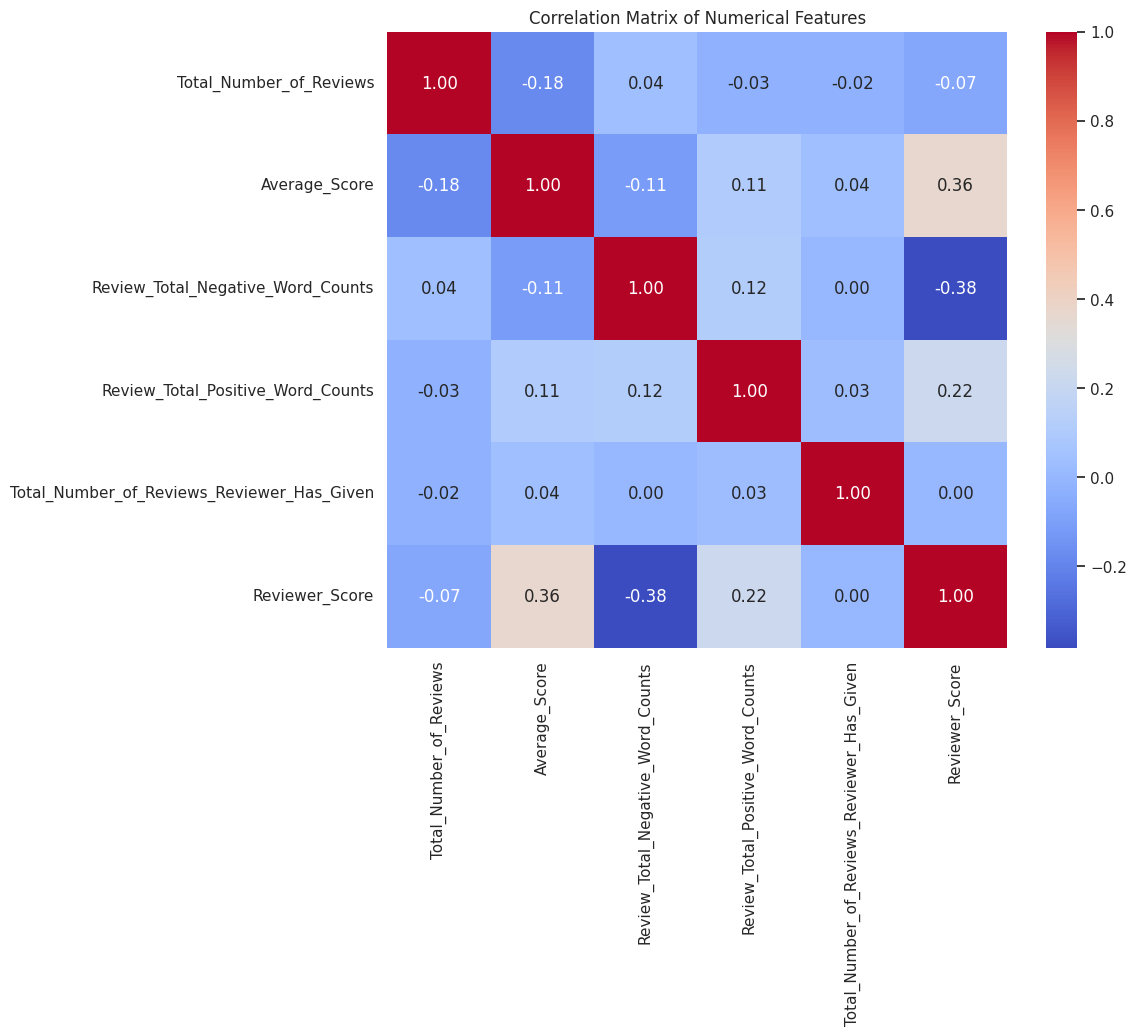

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting numerical columns for correlation analysis
numerical_columns = ['Total_Number_of_Reviews', 'Average_Score', 'Review_Total_Negative_Word_Counts',
                     'Review_Total_Positive_Word_Counts',
                     'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score']

# Calculating correlation matrix
corr_matrix = data[numerical_columns].corr()

# Plotting heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


**Plot 2: Distribution of Reviewer_Score across the top 5 nationalities by review count. This visualization helps in understanding how scores vary among reviewers from different nationalities, showing both the density of scores at different points and the range of scores.**

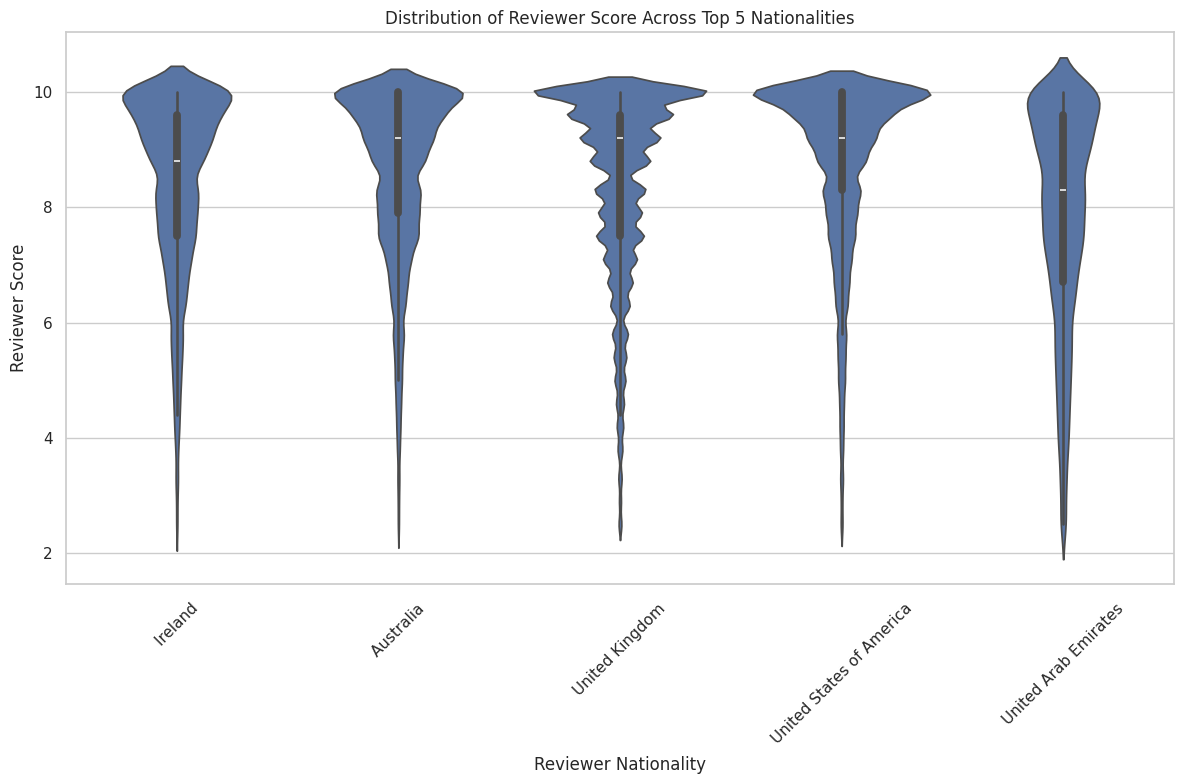

In [ ]:
# Preparing data for the violin plot: Selecting the top 5 nationalities by review count
top_nationalities = data['Reviewer_Nationality'].value_counts().head(5).index

# Filtering data for these top nationalities
top_nationality_data = data[data['Reviewer_Nationality'].isin(top_nationalities)]

# Creating the violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='Reviewer_Nationality', y='Reviewer_Score', data=top_nationality_data)
plt.title('Distribution of Reviewer Score Across Top 5 Nationalities')
plt.xticks(rotation=45)
plt.xlabel('Reviewer Nationality')
plt.ylabel('Reviewer Score')
plt.tight_layout()
plt.show()


***Plot 3: The stacked bar chart above compares the positive versus negative word counts for the top 5 hotels by review count.***

This visualization helps in understanding the balance between positive and negative feedback for each hotel. A larger lower segment (positive word counts) suggests more favorable reviews, while a significant upper segment indicates a higher volume of criticisms or areas for improvement.

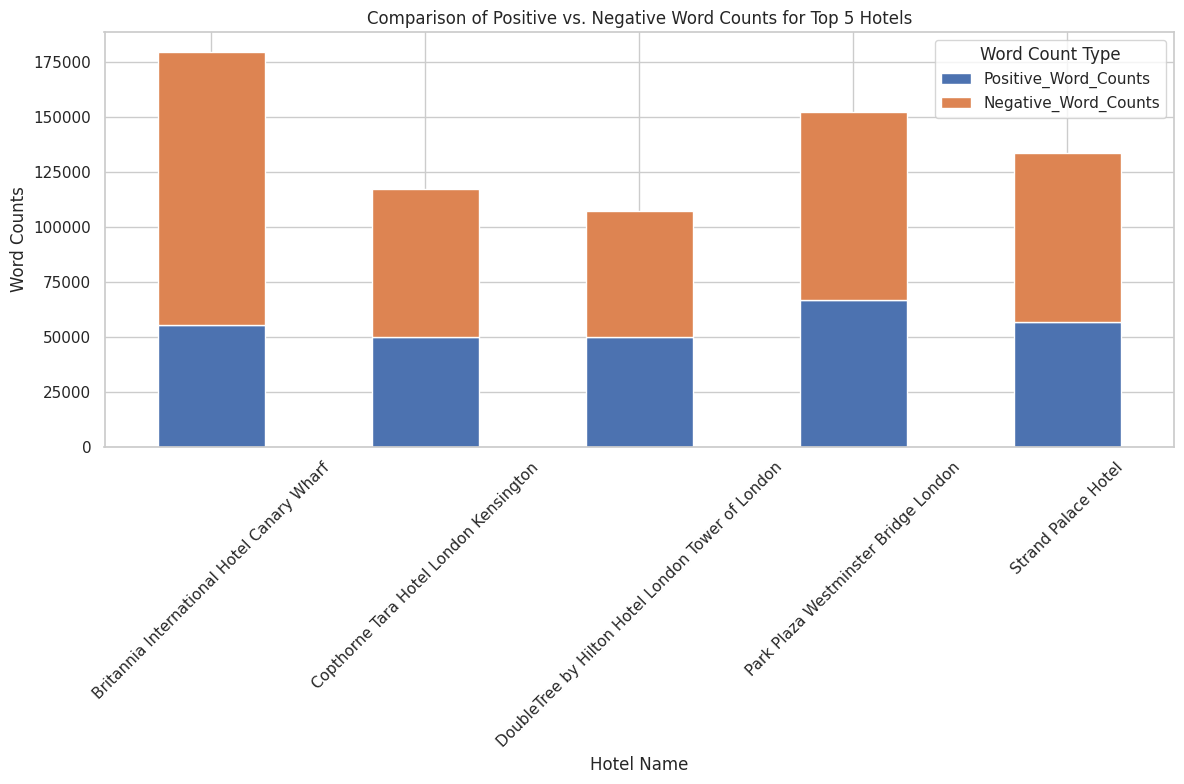

In [ ]:
# Preparing data for the stacked bar chart: Selecting a few hotels with the most reviews
top_hotels = data['Hotel_Name'].value_counts().head(5).index

# Filtering data for these top hotels
top_hotel_data = data[data['Hotel_Name'].isin(top_hotels)]

# Aggregating positive and negative word counts for these hotels
hotel_word_counts = top_hotel_data.groupby('Hotel_Name').agg(
    Positive_Word_Counts=('Review_Total_Positive_Word_Counts', 'sum'),
    Negative_Word_Counts=('Review_Total_Negative_Word_Counts', 'sum')
).reset_index()

# Creating the stacked bar chart
hotel_word_counts.set_index('Hotel_Name').plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Comparison of Positive vs. Negative Word Counts for Top 5 Hotels')
plt.xlabel('Hotel Name')
plt.ylabel('Word Counts')
plt.xticks(rotation=45)
plt.legend(title='Word Count Type')
plt.tight_layout()
plt.show()


Plot 4:

<ipython-input-170-dd91104f2388>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Reviewer_Score', y='Reviewer_Nationality', data=avg_score_by_nationality_sorted.head(20), palette="coolwarm")


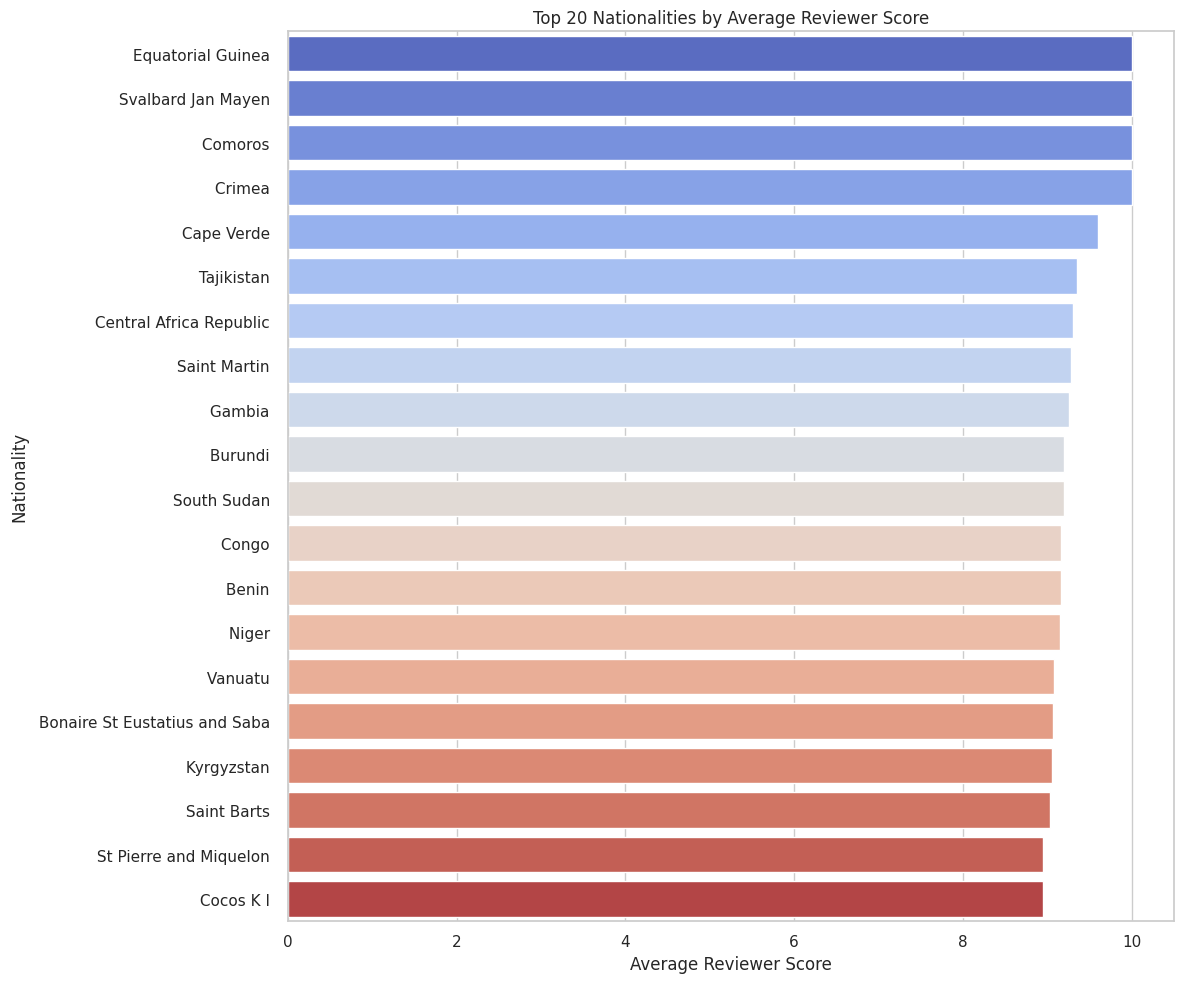

In [ ]:
# Grouping data by nationality and calculating average Reviewer_Score
avg_score_by_nationality = data.groupby('Reviewer_Nationality')['Reviewer_Score'].mean().reset_index()

# Sorting the nationalities by average score for better visualization
avg_score_by_nationality_sorted = avg_score_by_nationality.sort_values('Reviewer_Score', ascending=False)

# Plotting
plt.figure(figsize=(12, 10))
sns.barplot(x='Reviewer_Score', y='Reviewer_Nationality', data=avg_score_by_nationality_sorted.head(20), palette="coolwarm")
plt.title('Top 20 Nationalities by Average Reviewer Score')
plt.xlabel('Average Reviewer Score')
plt.ylabel('Nationality')
plt.tight_layout()

# Display the plot
plt.show()


<ipython-input-171-bfcd2c08a90d>:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Hotel_Name', y='Reviewer_Score', hue='Reviewer_Nationality', data=avg_score_filtered_top_nat, ci=None)


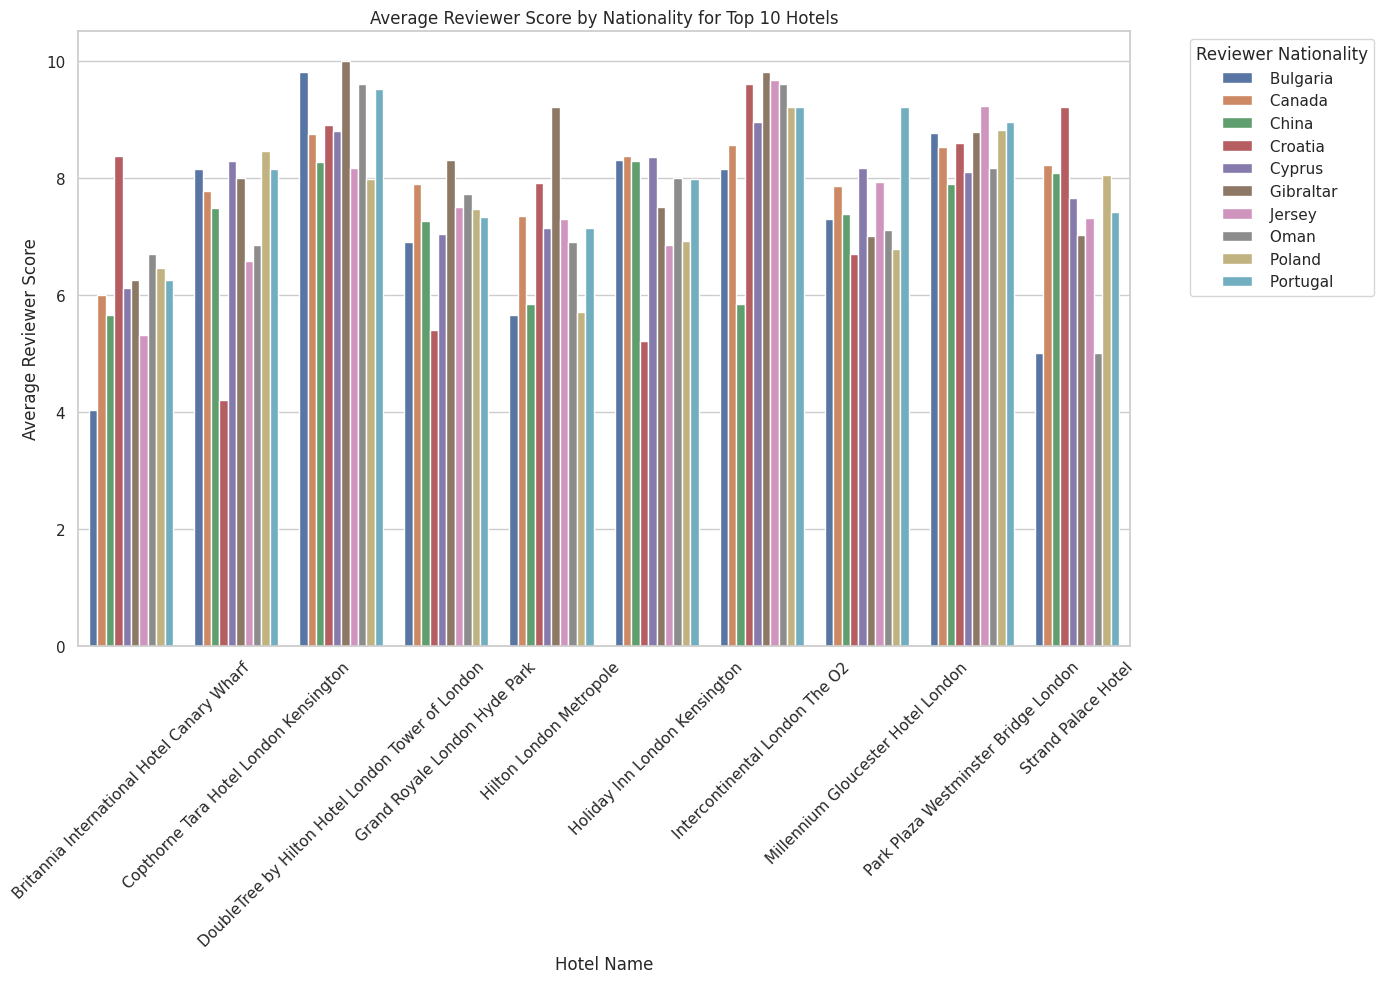

In [ ]:
# Grouping data by nationality and hotel, then calculating the average Reviewer_Score
avg_score_by_nationality_and_hotel = data.groupby(['Reviewer_Nationality', 'Hotel_Name'])['Reviewer_Score'].mean().reset_index()

# Finding top 10 hotels by review count
top_10_hotels = data['Hotel_Name'].value_counts().head(10).index

# Filtering the data for top 10 hotels
avg_score_filtered = avg_score_by_nationality_and_hotel[avg_score_by_nationality_and_hotel['Hotel_Name'].isin(top_10_hotels)]

# Since there are many nationalities, for readability, let's focus on the top nationalities by review count within these hotels
top_nationalities_in_top_hotels = avg_score_filtered['Reviewer_Nationality'].value_counts().head(10).index

# Further filtering the data to include only top nationalities
avg_score_filtered_top_nat = avg_score_filtered[avg_score_filtered['Reviewer_Nationality'].isin(top_nationalities_in_top_hotels)]

# Plotting
plt.figure(figsize=(14, 10))
sns.barplot(x='Hotel_Name', y='Reviewer_Score', hue='Reviewer_Nationality', data=avg_score_filtered_top_nat, ci=None)
plt.title('Average Reviewer Score by Nationality for Top 10 Hotels')
plt.xticks(rotation=45)
plt.ylabel('Average Reviewer Score')
plt.xlabel('Hotel Name')
plt.legend(title='Reviewer Nationality', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Display the plot
plt.show()
